In [2]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
import missingno as msno

In [16]:
path = 'C:\\Users\\janani\\AI\\sepsis\\EDA\\'

In [3]:
training_data = pd.read_csv('sepsis_data.psv', sep ='|')

In [4]:
training_data.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

In [5]:
df = training_data['SepsisLabel'].value_counts()
df

0    1524348
1      27916
Name: SepsisLabel, dtype: int64

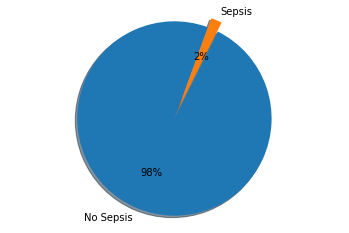

In [17]:
no_sepsis_percent = (df[0]/(df[0]+df[1]))*100
sepsis_percent = (df[1]/(df[0]+df[1]))*100
#fig = plt.figure(figsize=(5,5))
labels = 'No Sepsis', 'Sepsis'
sizes = [no_sepsis_percent, sepsis_percent]
explode = (0, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.0f%%', shadow=True, startangle = 70)
ax1.axis('equal')
plt.savefig(path+'percent_sepsis.png')
plt.show()

In [18]:
missing_data = training_data.isnull().sum()
missing_data

HR                   153404
O2Sat                202746
Temp                1027028
SBP                  226277
MAP                  193282
DBP                  486608
Resp                 238339
EtCO2               1494628
BaseExcess          1468112
HCO3                1487234
FiO2                1422895
pH                  1444684
PaCO2               1465957
SaO2                1498699
AST                 1527080
BUN                 1445694
Alkalinephos        1527322
Calcium             1460931
Chloride            1481796
Creatinine          1457646
Bilirubin_direct    1549274
Glucose             1286746
Lactate             1510818
Magnesium           1454311
Phosphate           1489961
Potassium           1407737
Bilirubin_total     1529122
TroponinI           1537483
Hct                 1414829
Hgb                 1437671
PTT                 1506565
WBC                 1452815
Fibrinogen          1542022
Platelets           1460053
Age                       0
Gender              

In [19]:
# percentage of missingness
missing_percent = (missing_data/training_data.shape[0])*100
missing_percent

HR                   9.882597
O2Sat               13.061309
Temp                66.163230
SBP                 14.577224
MAP                 12.451619
DBP                 31.348276
Resp                15.354283
EtCO2               96.286972
BaseExcess          94.578757
HCO3                95.810635
FiO2                91.665786
pH                  93.069478
PaCO2               94.439928
SaO2                96.549234
AST                 98.377596
BUN                 93.134544
Alkalinephos        98.393186
Calcium             94.116143
Chloride            95.460308
Creatinine          93.904516
Bilirubin_direct    99.807378
Glucose             82.894791
Lactate             97.329964
Magnesium           93.689669
Phosphate           95.986314
Potassium           90.689277
Bilirubin_total     98.509145
TroponinI           99.047778
Hct                 91.146158
Hgb                 92.617686
PTT                 97.055978
WBC                 93.593293
Fibrinogen          99.340190
Platelets 

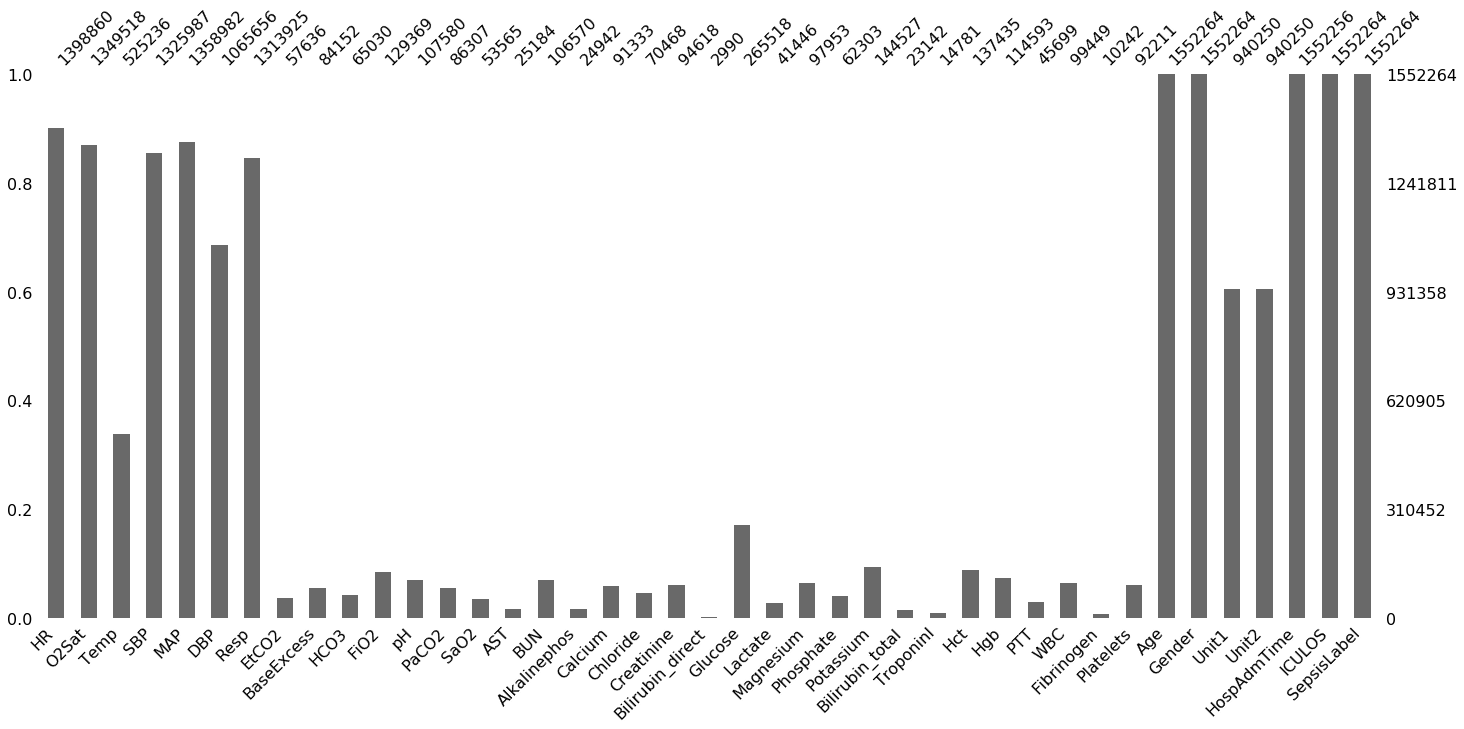

In [21]:
msno.bar(training_data)

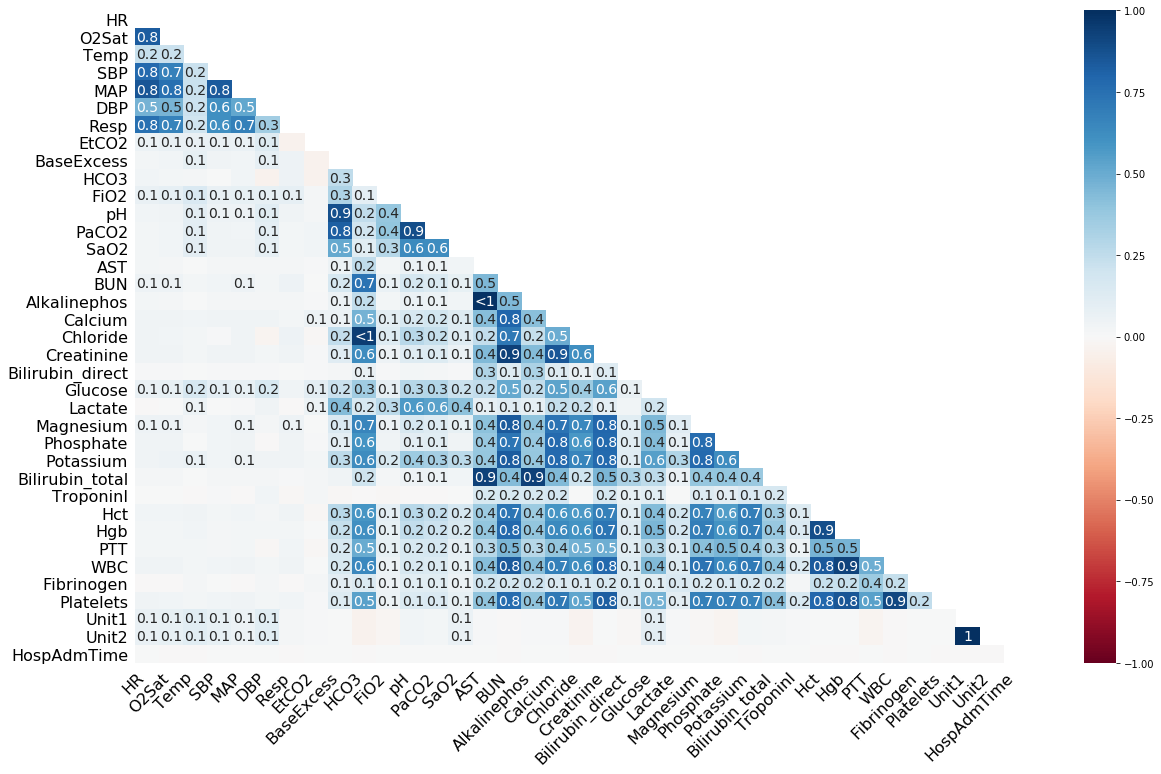

In [22]:
msno.heatmap(training_data)

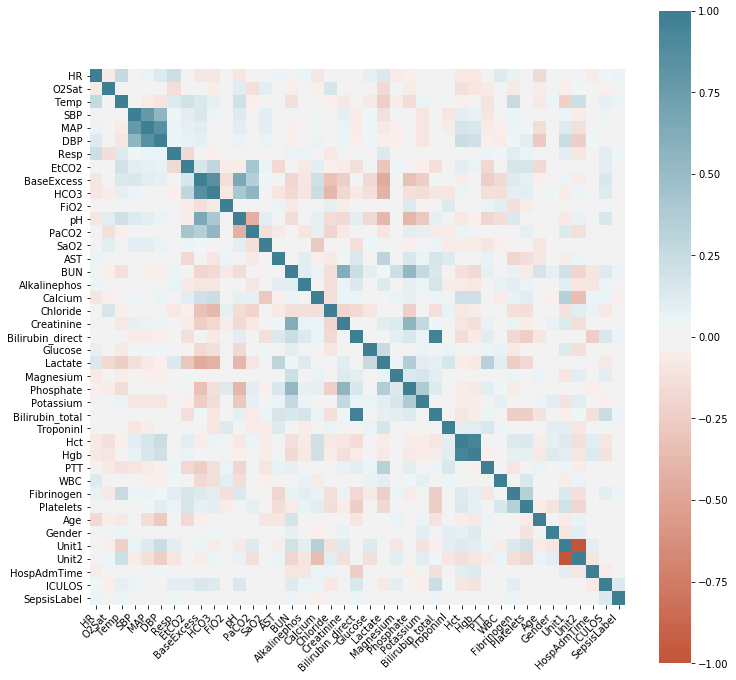

In [23]:
fig = plt.figure(figsize=(12,12))
corr = training_data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [28]:
sns.set_style('whitegrid')
sns.scatterplot(x='DBP',y='MAP',hue='SepsisLabel',data=training_data)
# sns.FacetGrid(training_data, hue='SepsisLabel', size=4) \
#  .map(plt.scatter, 'DBP', 'MAP') \
#  .add_legend();
# plt.show();

Error in callback <function flush_figures at 0x000002C2AF1074C8> (for post_execute):


KeyboardInterrupt: 

In [29]:
new_cols = list(missing_percent[missing_percent < 92].index)

In [31]:
sepsis_data = training_data[new_cols]

In [32]:
new_missing_data = sepsis_data.isnull().sum()
new_missing_percent = (new_missing_data/sepsis_data.shape[0])*100
new_missing_percent

HR              9.882597
O2Sat          13.061309
Temp           66.163230
SBP            14.577224
MAP            12.451619
DBP            31.348276
Resp           15.354283
FiO2           91.665786
Glucose        82.894791
Potassium      90.689277
Hct            91.146158
Age             0.000000
Gender          0.000000
Unit1          39.427185
Unit2          39.427185
HospAdmTime     0.000515
ICULOS          0.000000
SepsisLabel     0.000000
dtype: float64

In [33]:
new_missing_data = sepsis_data.isnull().sum()
new_missing_percent = (new_missing_data/sepsis_data.shape[0])*100
new_missing_percent

HR              9.882597
O2Sat          13.061309
Temp           66.163230
SBP            14.577224
MAP            12.451619
DBP            31.348276
Resp           15.354283
FiO2           91.665786
Glucose        82.894791
Potassium      90.689277
Hct            91.146158
Age             0.000000
Gender          0.000000
Unit1          39.427185
Unit2          39.427185
HospAdmTime     0.000515
ICULOS          0.000000
SepsisLabel     0.000000
dtype: float64

In [34]:

new_df = sepsis_data['SepsisLabel'].value_counts()
new_df

0    1524348
1      27916
Name: SepsisLabel, dtype: int64

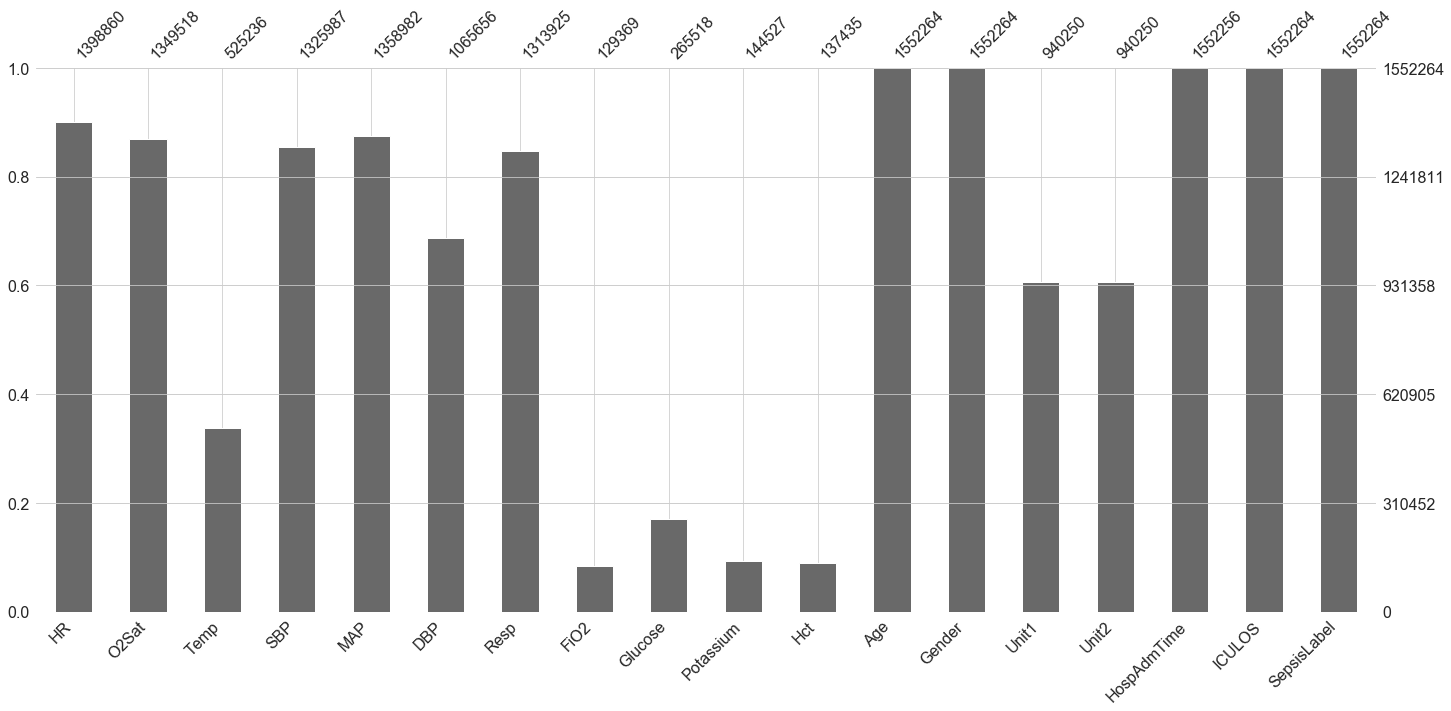

In [35]:
msno.bar(sepsis_data)

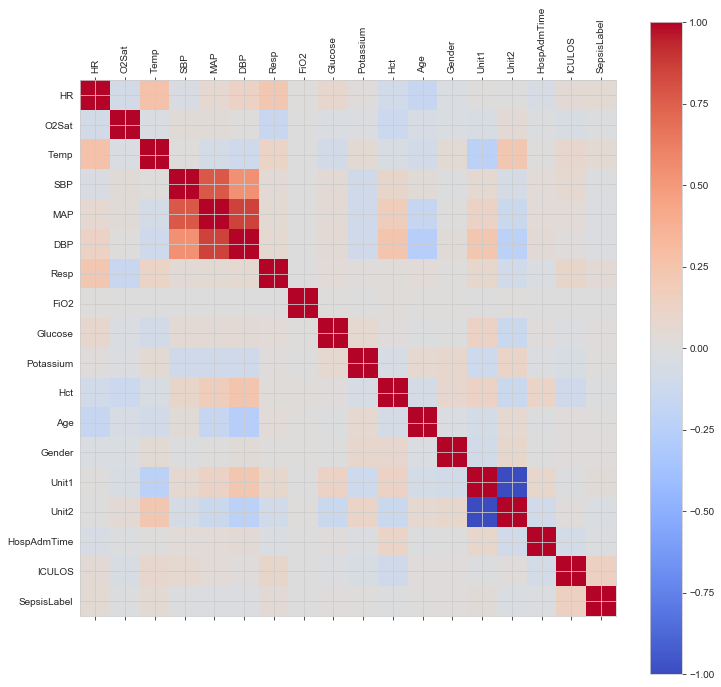

In [36]:
corr = sepsis_data.corr()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(sepsis_data.columns), 1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(sepsis_data.columns)
ax.set_yticklabels(sepsis_data.columns)

#plt.savefig('Saved_Figures/correlation.png')
plt.show()

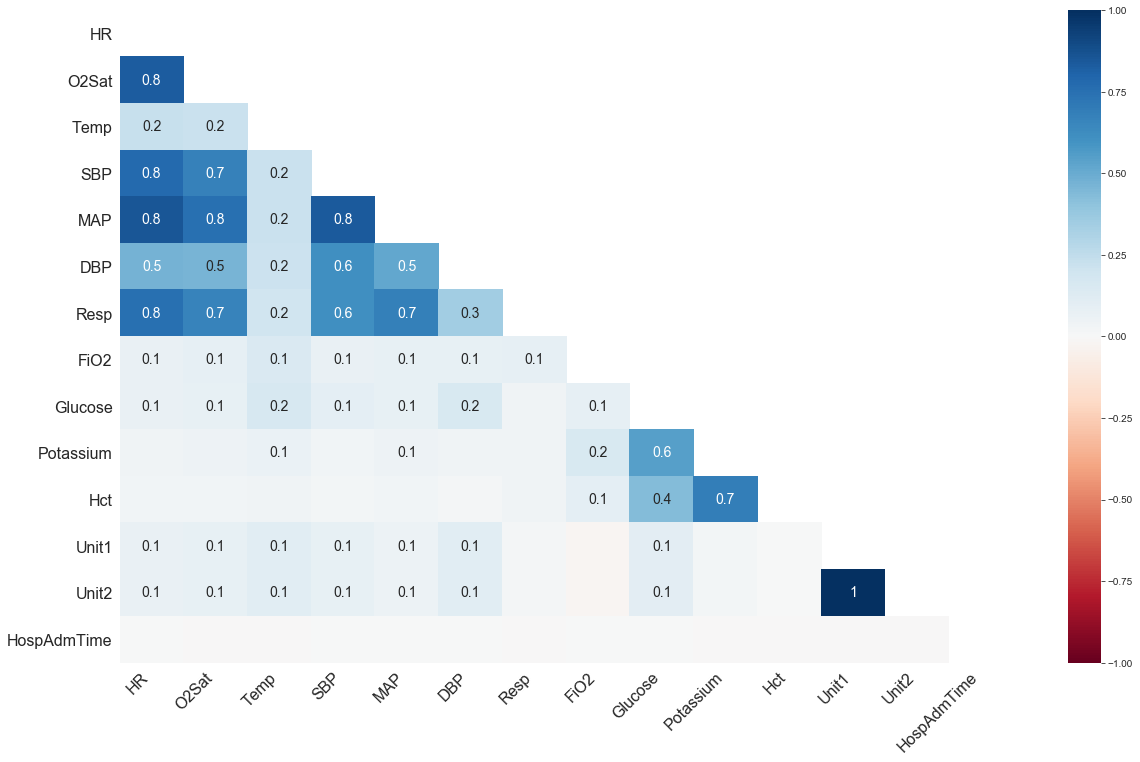

In [37]:
msno.heatmap(sepsis_data)

In [38]:
demo_data = sepsis_data.dtypes == object

#demo_data['Age'] = True
demo_data['Unit1'] = True
demo_data['Unit2'] = True
demo_data['Gender'] = True
#demo_data['ICULOS'] = True

demo_data

HR             False
O2Sat          False
Temp           False
SBP            False
MAP            False
DBP            False
Resp           False
FiO2           False
Glucose        False
Potassium      False
Hct            False
Age            False
Gender          True
Unit1           True
Unit2           True
HospAdmTime    False
ICULOS         False
SepsisLabel    False
dtype: bool

In [39]:

demo_list = list(demo_data[demo_data].index)

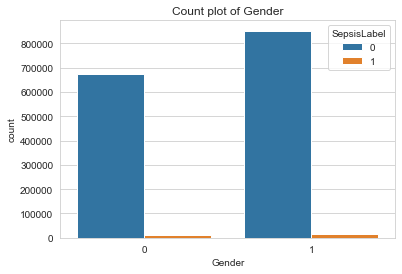

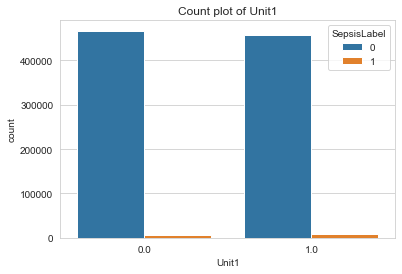

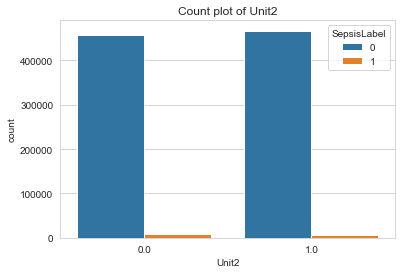

In [40]:
for i,var in enumerate(demo_list):
    plt.figure(i)
    plt.title("Count plot of " + str(var))
    sns.countplot(sepsis_data[var].dropna(), hue='SepsisLabel', data= sepsis_data);